# **TUGAS BESAR 1 VISUALISASI DATA**
# Exploratory Data Analysis (EDA): Farmers Markets in the U.S.

---

**DISUSUN OLEH :**
Nama : Sevyan Rangga Infari,
NIM : 41822120017,
Fakultas : Ilmu Komputer,
Prodi : Sistem Informasi

---

Dataset ini berisi informasi tentang pasar petani di Amerika Serikat, termasuk lokasi, produk yang dijual, lama pasar dibuka, dan populasi negara bagian. Analisis ini bertujuan untuk menggali wawasan dari data menggunakan konsep Exploratory Data Analysis (EDA).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Load dataset
file_path = '/content/markets_cleaned.csv'
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,name,city,county,state,lat,lon,months_open,Bakedgoods,Beans,...,Prepared,Seafood,Soap,Tofu,Trees,Vegetables,WildHarvested,Wine,num_items_sold,state_pop
0,0,Island Market,Key Largo,Monroe,Florida,-80.427218,25.109214,6,1,1,...,1,1,1,0,0,1,0,0,18,19893297.0
1,1,COFFO Harvest Farmers' Market,Florida City,Miami-Dade,Florida,-80.482299,25.449850,12,0,0,...,1,0,0,0,1,1,0,0,7,19893297.0
2,2,COFFO Harvest Farmers' Market,Homestead,Miami-Dade,Florida,-80.483400,25.463500,12,0,0,...,1,0,0,0,1,1,0,0,7,19893297.0
3,3,Verde Gardens Farmers Market,Homestead,Miami-Dade,Florida,-80.395607,25.506727,12,0,0,...,1,0,0,0,0,1,0,0,5,19893297.0
4,4,Verde Community Farm and Market,Homestead,Miami-Dade,Florida,-80.395607,25.506727,9,0,0,...,0,0,0,0,0,1,0,0,5,19893297.0


# **1. Informasi Awal dan Struktur Data**

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5343 entries, 0 to 5342
Data columns (total 39 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5343 non-null   int64  
 1   name            5343 non-null   object 
 2   city            5340 non-null   object 
 3   county          5341 non-null   object 
 4   state           5343 non-null   object 
 5   lat             5339 non-null   float64
 6   lon             5339 non-null   float64
 7   months_open     5343 non-null   int64  
 8   Bakedgoods      5343 non-null   int64  
 9   Beans           5343 non-null   int64  
 10  Cheese          5343 non-null   int64  
 11  Coffee          5343 non-null   int64  
 12  Crafts          5343 non-null   int64  
 13  Eggs            5343 non-null   int64  
 14  Flowers         5343 non-null   int64  
 15  Fruits          5343 non-null   int64  
 16  Grains          5343 non-null   int64  
 17  Herbs           5343 non-null   i

# **2. Missing Values**

In [3]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

,0
city,3
county,2
lat,4
lon,4


# **3. Jumlah Pasar per Negara Bagian**

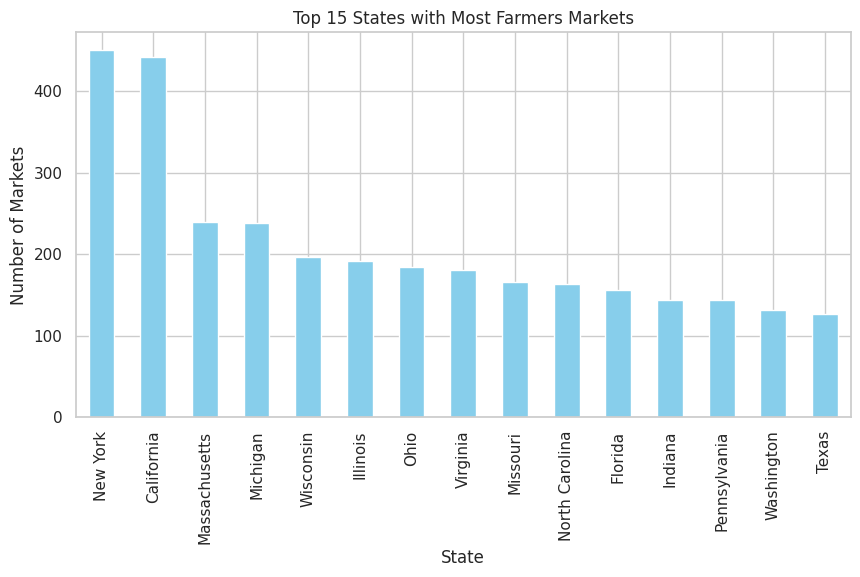

In [4]:
state_counts = df['state'].value_counts().sort_values(ascending=False)
state_counts.head(15).plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title('Top 15 States with Most Farmers Markets')
plt.xlabel('State')
plt.ylabel('Number of Markets')
plt.show()

# **4. Produk Yang Paling Umum Dijual**

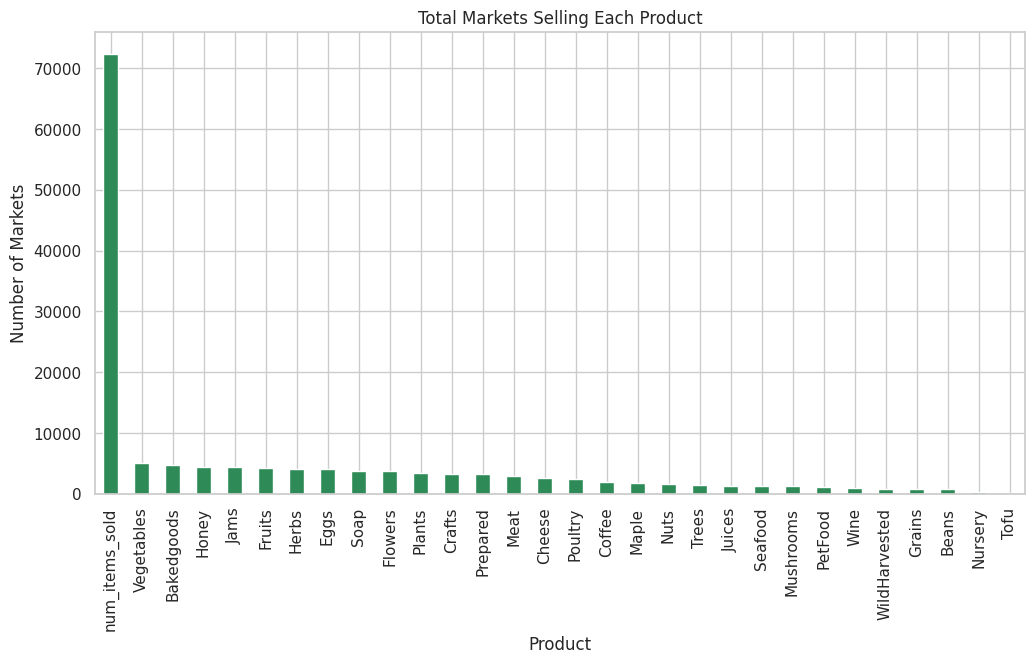

In [5]:
product_columns = df.columns[8:38]
product_totals = df[product_columns].sum().sort_values(ascending=False)
product_totals.plot(kind='bar', figsize=(12,6), color='seagreen')
plt.title('Total Markets Selling Each Product')
plt.xlabel('Product')
plt.ylabel('Number of Markets')
plt.show()

# **5. Korelasi**

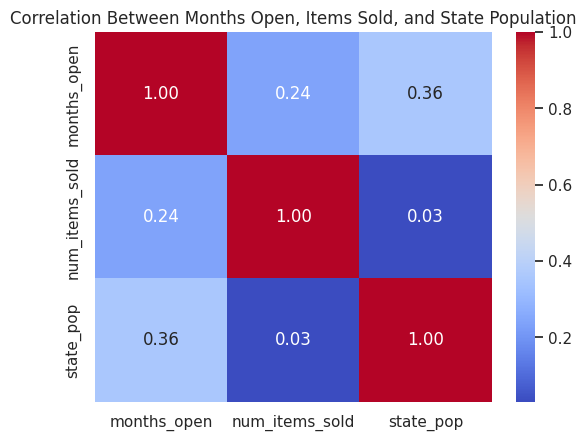

In [6]:
correlation_data = df[['months_open', 'num_items_sold', 'state_pop']].corr()
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Months Open, Items Sold, and State Population')
plt.show()

# **6. Kesimpulan**


- Beberapa kolom seperti `lat`, `lon`, `city`, dan `county` memiliki nilai kosong.
- Negara bagian dengan pasar petani terbanyak adalah **New York**, **California**, dan **Massachusetts**.
- Produk yang paling umum dijual adalah **Vegetables**, **Bakedgoods**, dan **Honey**.
- Pasar yang buka lebih lama cenderung menawarkan lebih banyak jenis produk.
- Populasi negara bagian tidak berkorelasi kuat dengan jumlah produk yang dijual oleh pasar.

Analisis ini dapat digunakan untuk memahami potensi lokal dan preferensi produk di berbagai wilayah.
